## Лабораторная работа №2

Выполнил: Мирошников Дмитрий, М8О-310Б-22

### 0. Импортируем библиотеки и загружаем датасеты

In [2175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим датасеты для обучения и тестирования

In [2176]:
DATA_PATH = "/home/dmitriimrsh/Projects/Labs/ML-Labs/Lab_02/data/train.csv"
df = pd.read_csv(DATA_PATH)

DATA_PATH_TEST = "/home/dmitriimrsh/Projects/Labs/ML-Labs/Lab_02/data/test.csv"
df_test = pd.read_csv(DATA_PATH_TEST)

df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


### 1. Приведение типов

In [2177]:
df.info()

#Надо что-то сделать с ApplicationDate, MartialStatus, HomeOwnershipStatus, LoanPurpose, EmploymentStatus, EducationLevel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

Приведём ApplicationDate к datetime, распарсим и удалим

In [2178]:
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')
df_test['ApplicationDate'] = pd.to_datetime(df_test['ApplicationDate'], errors='coerce')

df['ApplicationYear'] = df['ApplicationDate'].dt.year
df['ApplicationMonth'] = df['ApplicationDate'].dt.month
df['ApplicationDayOfMonth'] = df['ApplicationDate'].dt.day

df_test['ApplicationYear'] = df_test['ApplicationDate'].dt.year
df_test['ApplicationMonth'] = df_test['ApplicationDate'].dt.month
df_test['ApplicationDayOfMonth'] = df_test['ApplicationDate'].dt.day

df = df.drop('ApplicationDate', axis=1)
df_test = df_test.drop('ApplicationDate', axis=1)

One-Hot Encoding для MartialStatus, HomeOwnershipStatus, LoanPurpose, EmploymentStatus, EducationLevel

In [2179]:
df = pd.get_dummies(df, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'], drop_first=True)

df_test = pd.get_dummies(df_test, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'], drop_first=True)

Имеем после преобразований

In [2180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             10487 non-null  float64
 1   AnnualIncome                    10487 non-null  float64
 2   CreditScore                     9986 non-null   float64
 3   LoanAmount                      9986 non-null   float64
 4   LoanDuration                    10487 non-null  float64
 5   NumberOfDependents              10487 non-null  float64
 6   MonthlyDebtPayments             9986 non-null   float64
 7   CreditCardUtilizationRate       10487 non-null  float64
 8   NumberOfOpenCreditLines         10487 non-null  float64
 9   NumberOfCreditInquiries         10487 non-null  float64
 10  DebtToIncomeRatio               10487 non-null  float64
 11  BankruptcyHistory               9986 non-null   float64
 12  PreviousLoanDefaults            

### 2. Дубликаты и пропуски

Удалим дубликаты записей, каждый раз оставляя первое вхождение

In [2181]:
df = df.drop_duplicates(keep='first')

Удалим все строки с пропусками

In [2182]:
df.dropna(how='any', inplace=True)

#Число строк с пропусками составляет около 5 процентов от общего числа строк
#Это небольшая доля от общего числа записей в дата-фрейме, поэтому можно их удалить
#Также экспериментально было установлено, что при удалении всех записей с пропусками имеем лучший MSE

### 3. Обработка корреляций

Визуализируем матрицу корреляций с помощью HeatMap

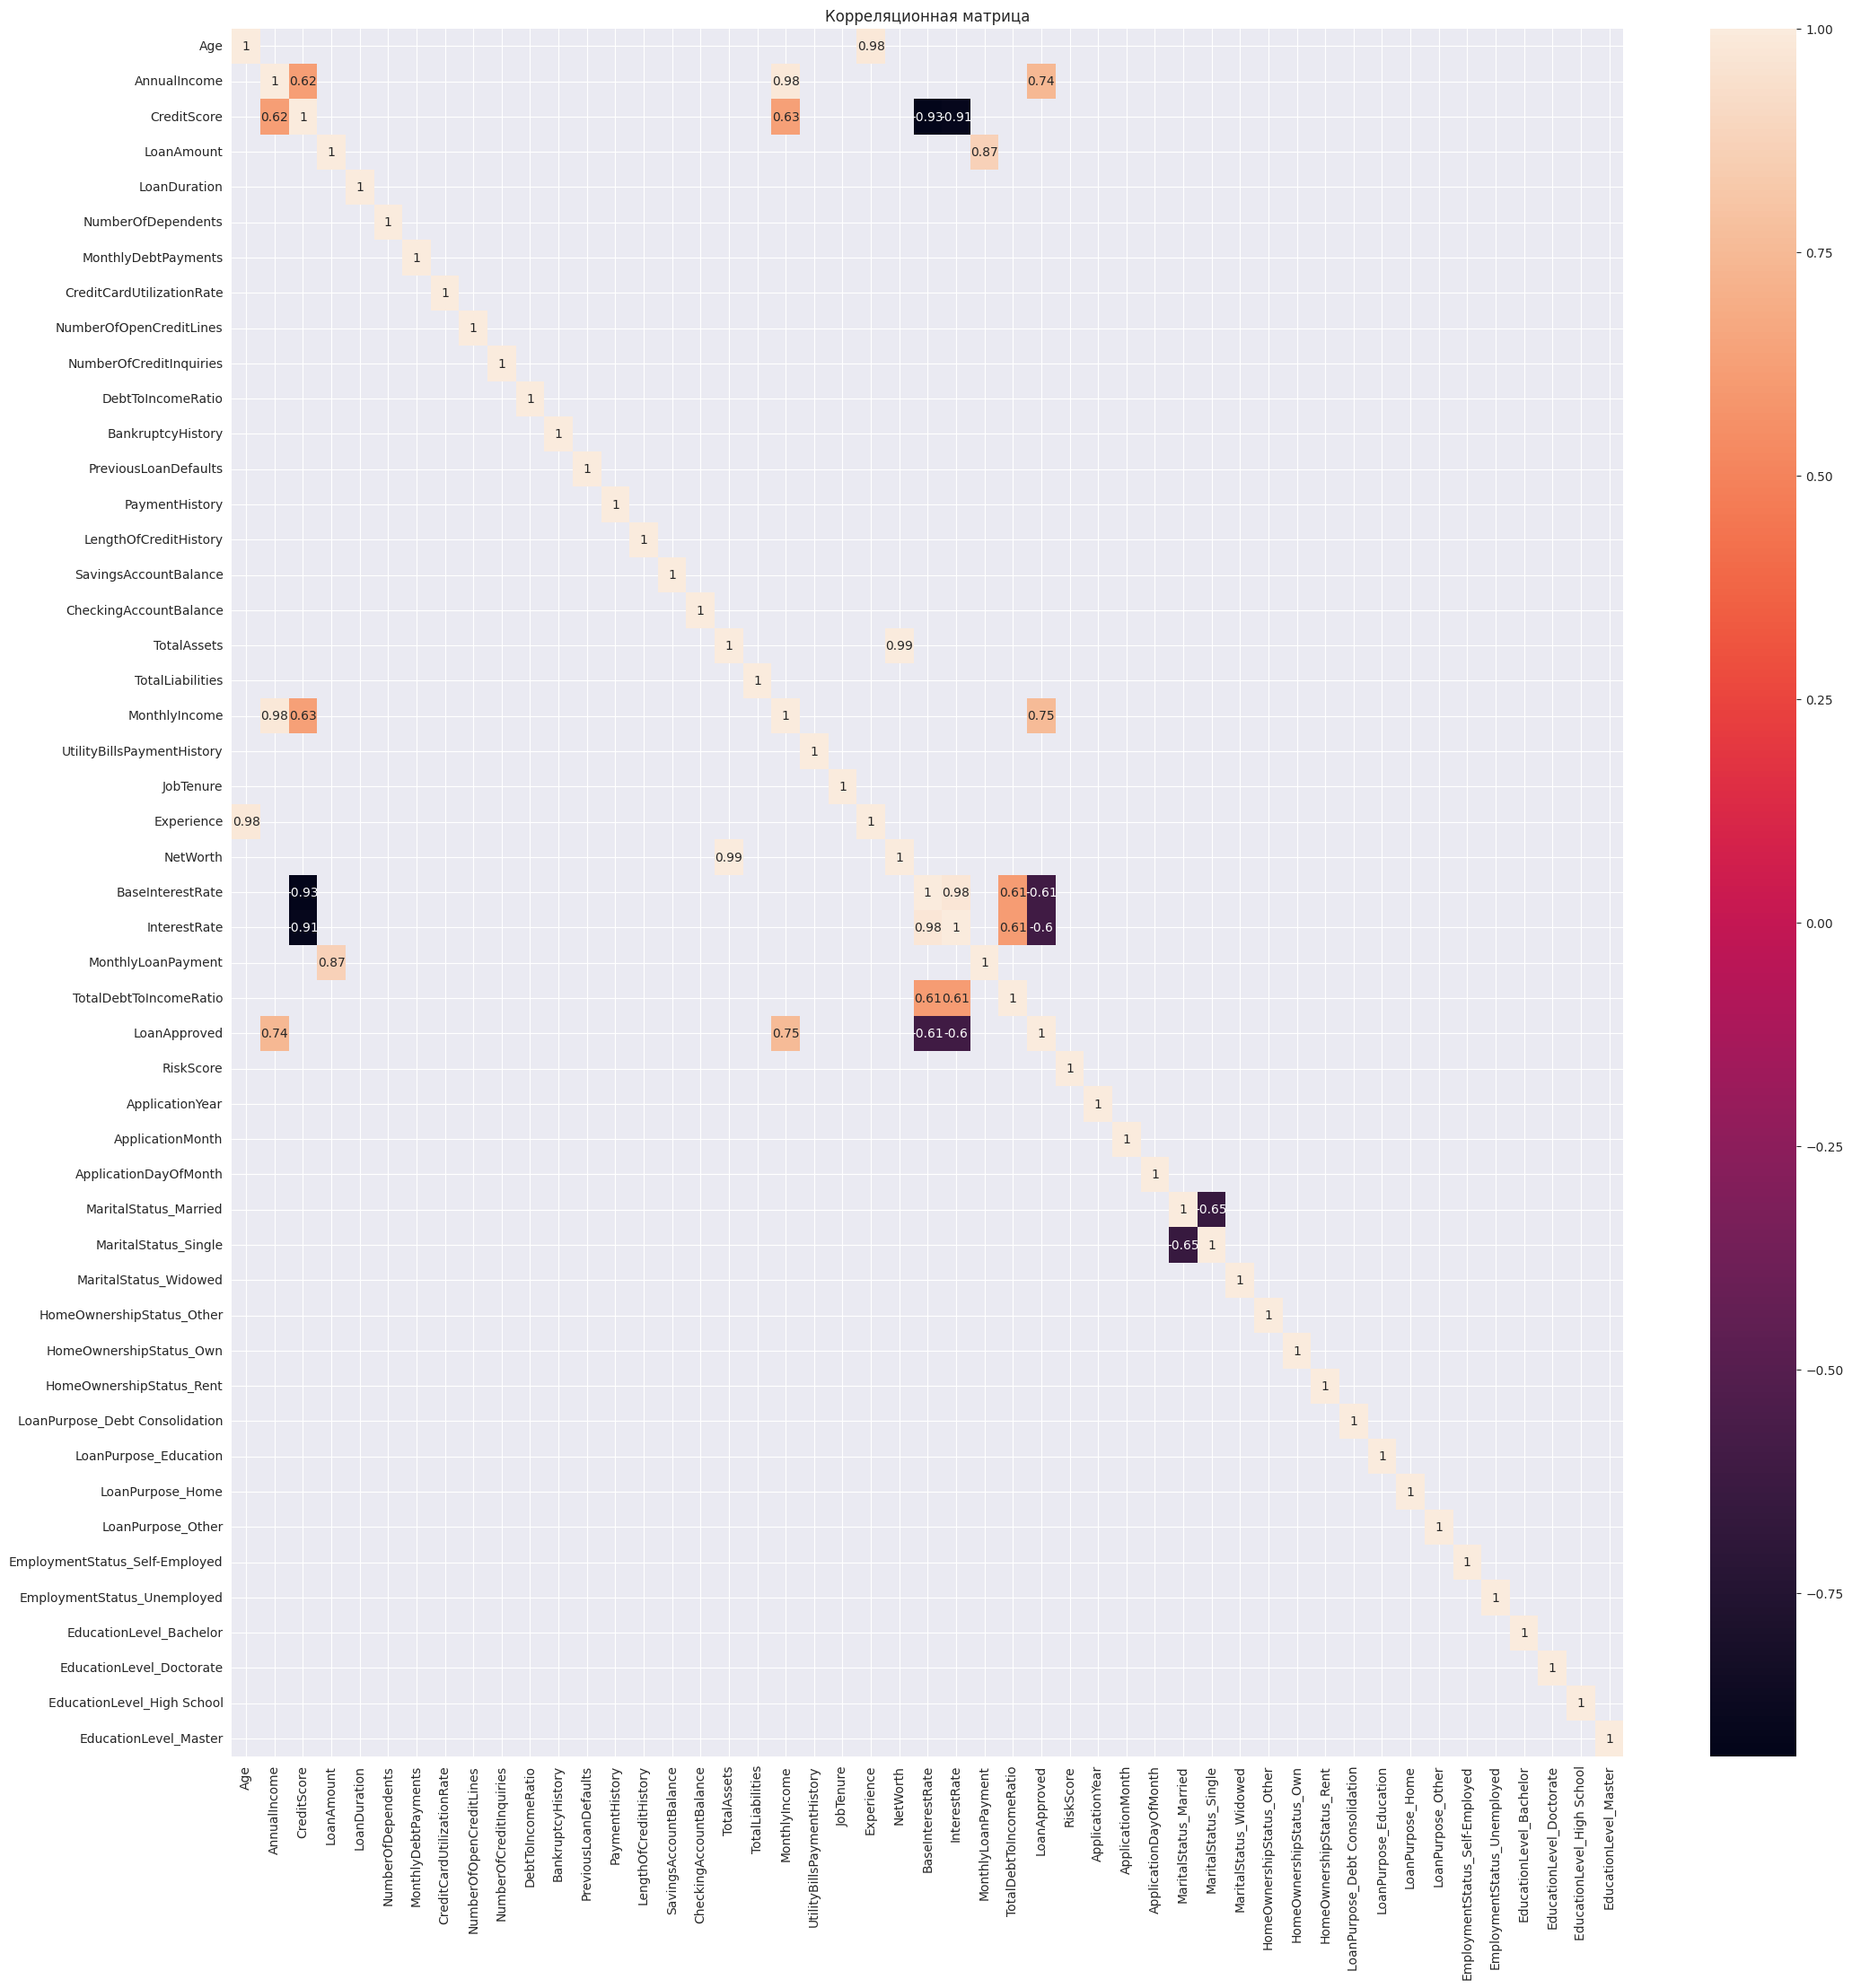

In [2183]:
corr_matrix = df.corr()

#Будем отображать зависимости начиная с умеренно сильной корреляции (>=0.6)

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix[corr_matrix.abs() >= 0.6], annot=True)
plt.title("Корреляционная матрица")
plt.show()

Обработка коррелирующих признаков

In [2184]:
#Рассмотрим признаки с сильной корреляцией (>=0.7)

high_corr = corr_matrix[(corr_matrix.abs() >= 0.7) & (corr_matrix != 1.0)].stack()
print(high_corr)

#Удалим признаки так, чтобы исключить линейные зависимости
#В случае зависимости категориальных признаков от некатегориальных будем стараться оставлять категориальные
#Также удалим 'лишние' столбцы 'RiskScore' и 'ID' для реализации обучения/предсказания на основе логистической регрессии и линейного классификатора
df = df.drop(
    [
        'Experience',
        'MonthlyIncome',
        'AnnualIncome',
        'InterestRate',
        'BaseInterestRate',
        'MonthlyLoanPayment',
        'TotalAssets',
        'RiskScore'
    ],
    axis=1
)

df_test = df_test.drop(
    [
        'Experience',
        'MonthlyIncome',
        'AnnualIncome',
        'InterestRate',
        'BaseInterestRate',
        'MonthlyLoanPayment',
        'TotalAssets',
        'ID'
    ],
    axis=1
)

Age                 Experience            0.982835
AnnualIncome        MonthlyIncome         0.984377
                    LoanApproved          0.742279
CreditScore         BaseInterestRate     -0.932792
                    InterestRate         -0.909006
LoanAmount          MonthlyLoanPayment    0.868396
TotalAssets         NetWorth              0.993873
MonthlyIncome       AnnualIncome          0.984377
                    LoanApproved          0.754917
Experience          Age                   0.982835
NetWorth            TotalAssets           0.993873
BaseInterestRate    CreditScore          -0.932792
                    InterestRate          0.975232
InterestRate        CreditScore          -0.909006
                    BaseInterestRate      0.975232
MonthlyLoanPayment  LoanAmount            0.868396
LoanApproved        AnnualIncome          0.742279
                    MonthlyIncome         0.754917
dtype: float64


### 4. Добавление новых признаков

In [2185]:
#Добавим нелинейные признаки, которые будут отражать взаимодействие оценки кредитоспособности и запрашиваемой суммы кредита,
#а также оценки кредитоспособности и общего соотношения долга к доходу.
#В теории, это должно улучшить точность модели

df['CreditScoreToLoanAmountComposition'] = df['CreditScore'] * df['LoanAmount']
df_test['CreditScoreToLoanAmountComposition'] = df_test['CreditScore'] * df_test['LoanAmount']

df['CreditScoreToTotalDebtToIncomeRatioComposition'] = df['CreditScore'] * df['TotalDebtToIncomeRatio'] 
df_test['CreditScoreToTotalDebtToIncomeRatioComposition'] = df_test['CreditScore'] * df_test['TotalDebtToIncomeRatio']

### 5. Нормализация признаков

In [2186]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
scaler_min_max = MinMaxScaler()

Нормализуем CreditScoreToLoanAmountComposition

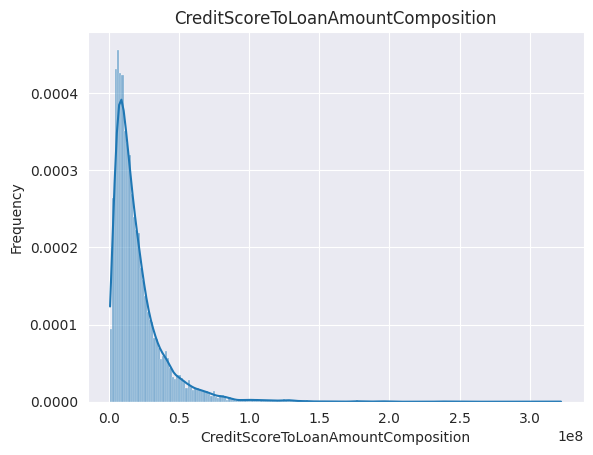

In [2187]:
sns.histplot(df['CreditScoreToLoanAmountComposition'], kde=True, stat='frequency')
plt.title('CreditScoreToLoanAmountComposition')
plt.show()

#Распределение похоже на функцию e^x в степени -1
#Применим сначала log-преобразование, потом z-score нормализацию

df['CreditScoreToLoanAmountComposition'] = np.log1p(df['CreditScoreToLoanAmountComposition'])
df_test['CreditScoreToLoanAmountComposition'] = np.log1p(df_test['CreditScoreToLoanAmountComposition'])

df['CreditScoreToLoanAmountComposition'] = scaler_standard.fit_transform(df[['CreditScoreToLoanAmountComposition']])
df_test['CreditScoreToLoanAmountComposition'] = scaler_standard.fit_transform(df_test[['CreditScoreToLoanAmountComposition']])

Нормализуем CreditScoreToTotalDebtToIncomeRatioComposition

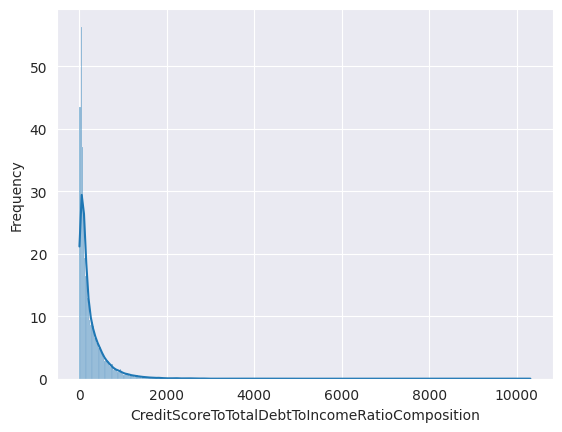

In [2188]:
sns.histplot(df['CreditScoreToTotalDebtToIncomeRatioComposition'], kde=True, stat='frequency')

#Распределение похоже на функцию e^x в степени -1
#Применим сначала log-преобразование, потом z-score нормализацию

df['CreditScoreToTotalDebtToIncomeRatioComposition'] = np.log1p(df['CreditScoreToTotalDebtToIncomeRatioComposition'])
df_test['CreditScoreToTotalDebtToIncomeRatioComposition'] = np.log1p(df_test['CreditScoreToTotalDebtToIncomeRatioComposition'])

df['CreditScoreToTotalDebtToIncomeRatioComposition'] = scaler_standard.fit_transform(df[['CreditScoreToTotalDebtToIncomeRatioComposition']])
df_test['CreditScoreToTotalDebtToIncomeRatioComposition'] = scaler_standard.fit_transform(df_test[['CreditScoreToTotalDebtToIncomeRatioComposition']])

Нормализуем ApplicationYear

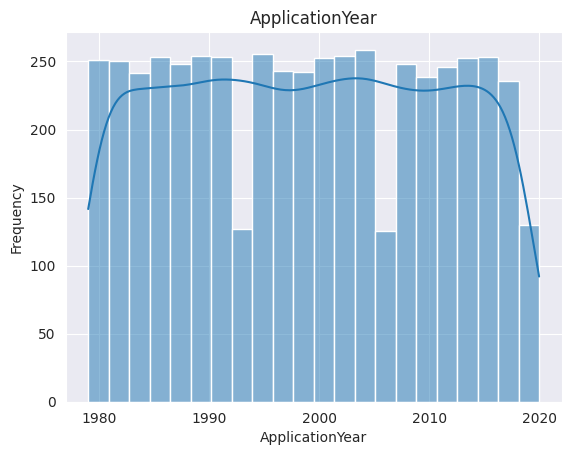

In [2189]:
sns.histplot(df['ApplicationYear'], kde=True, stat='frequency')
plt.title('ApplicationYear')
plt.show()

#Распределение примерно равномерное, используем min-max нормализацию

df['ApplicationYear'] = scaler_min_max.fit_transform(df[['ApplicationYear']])
df_test['ApplicationYear'] = scaler_min_max.fit_transform(df_test[['ApplicationYear']]) 

Нормализуем ApplicationMonth

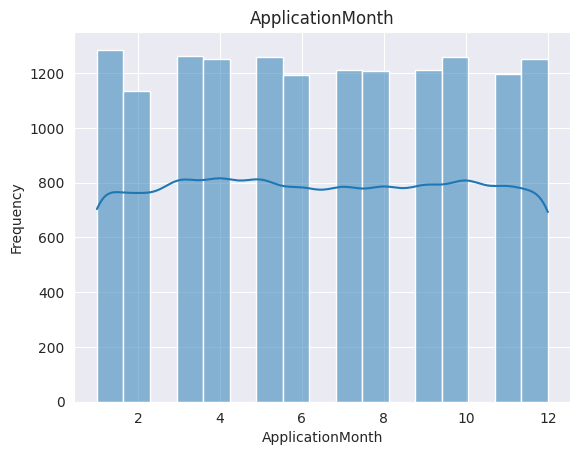

In [2190]:
sns.histplot(df['ApplicationMonth'], kde=True, stat='frequency')
plt.title('ApplicationMonth')
plt.show()

#Распределение примерно равномерное, используем min-max нормализацию

df['ApplicationMonth'] = scaler_min_max.fit_transform(df[['ApplicationMonth']])
df_test['ApplicationMonth'] = scaler_min_max.fit_transform(df_test[['ApplicationMonth']])

Нормализуем ApplicationDayOfMonth

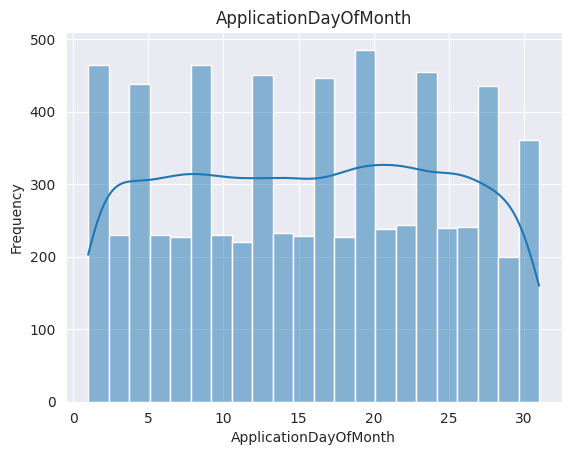

In [2191]:
sns.histplot(df['ApplicationDayOfMonth'], kde=True, stat='frequency')
plt.title('ApplicationDayOfMonth')
plt.show()

#Распределение примерно равномерное, используем min-max нормализацию

df['ApplicationDayOfMonth'] = scaler_min_max.fit_transform(df[['ApplicationDayOfMonth']])
df_test['ApplicationDayOfMonth'] = scaler_min_max.fit_transform(df_test[['ApplicationDayOfMonth']])

Нормализуем Age

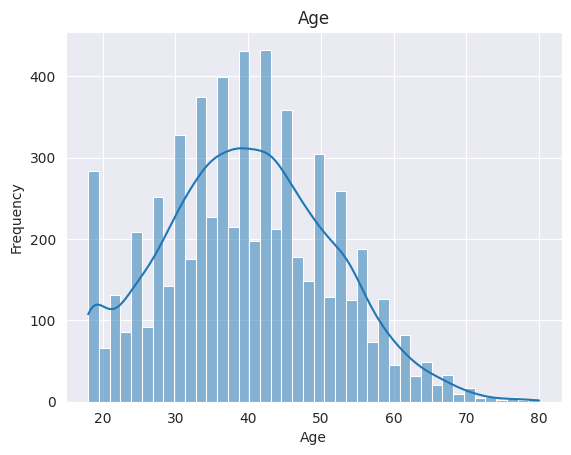

In [2192]:
sns.histplot(df['Age'], kde=True, stat='frequency')
plt.title('Age')
plt.show()

#Распределение по возрастам примерно нормальное - применим z-score нормализацию

df['Age'] = scaler_standard.fit_transform(df[['Age']])
df_test['Age'] = scaler_standard.fit_transform(df_test[['Age']])

Нормализуем CreditScore

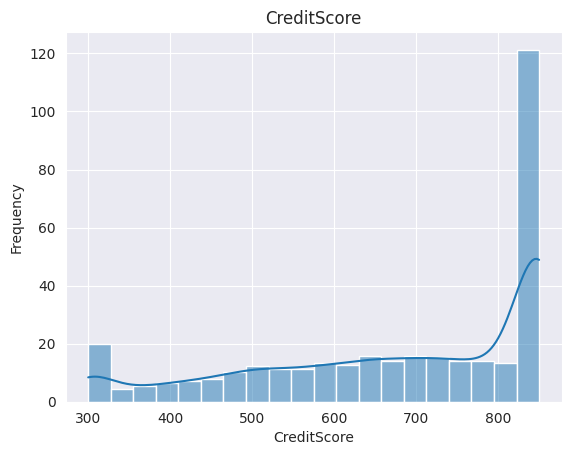

In [2193]:
sns.histplot(df['CreditScore'], kde=True, stat='frequency')
plt.title('CreditScore')
plt.show()

#Здесь применим min-max нормализацию, распределение больше походит на равномерное

df['CreditScore'] = scaler_min_max.fit_transform(df[['CreditScore']])
df_test['CreditScore'] = scaler_min_max.fit_transform(df_test[['CreditScore']])

Нормализуем LoanDuration

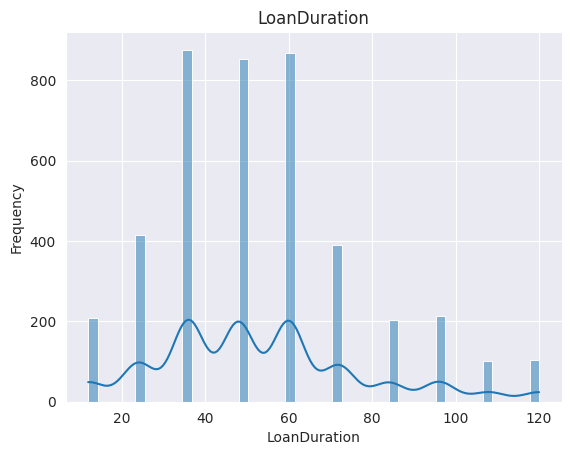

In [2194]:
sns.histplot(df['LoanDuration'], kde=True, stat='frequency')
plt.title('LoanDuration')
plt.show()

#Распределение больше походит на нормальное, используем z-score

df['LoanDuration'] = scaler_standard.fit_transform(df[['LoanDuration']])
df_test['LoanDuration'] = scaler_standard.fit_transform(df_test[['LoanDuration']])

Нормализуем NumberOfDependents

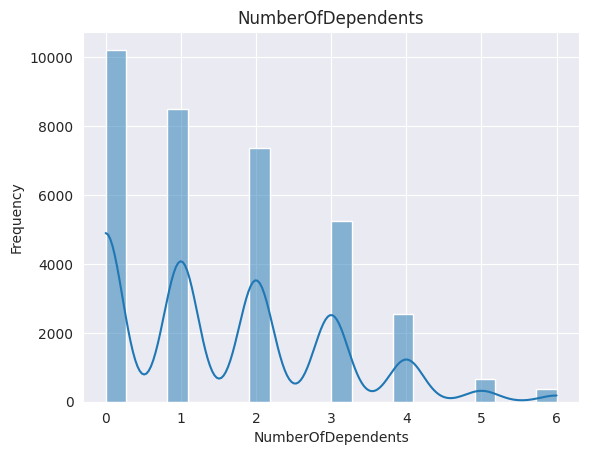

In [2195]:
sns.histplot(df['NumberOfDependents'], kde=True, stat='frequency')
plt.title('NumberOfDependents')
plt.show()

#Распределение похоже на функцию e^x в степени -1
#Применим сначала log-преобразование, потом z-score нормализацию

df['NumberOfDependents'] = np.log1p(df['NumberOfDependents'])
df['NumberOfDependents'] = scaler_standard.fit_transform(df[['NumberOfDependents']])

df_test['NumberOfDependents'] = np.log1p(df_test['NumberOfDependents'])
df_test['NumberOfDependents'] = scaler_standard.fit_transform(df_test[['NumberOfDependents']])

Нормализуем MonthlyDebtPayments

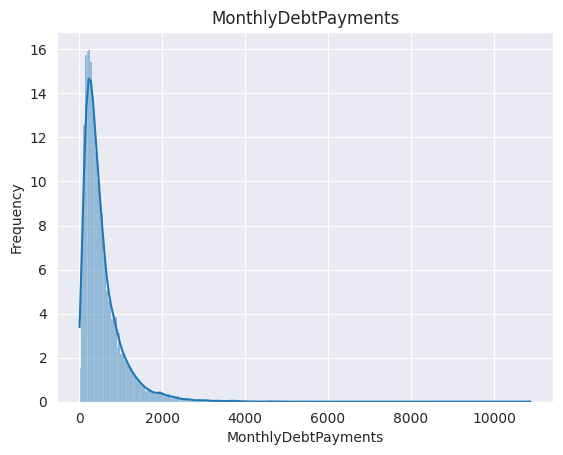

In [2196]:
sns.histplot(df['MonthlyDebtPayments'], kde=True, stat='frequency')
plt.title('MonthlyDebtPayments')
plt.show()

#Аналогично сначала логарифмируем, потом z-score

df['MonthlyDebtPayments'] = np.log1p(df['MonthlyDebtPayments'])
df['MonthlyDebtPayments'] = scaler_standard.fit_transform(df[['MonthlyDebtPayments']]) 

df_test['MonthlyDebtPayments'] = np.log1p(df_test['MonthlyDebtPayments'])
df_test['MonthlyDebtPayments'] = scaler_standard.fit_transform(df_test[['MonthlyDebtPayments']])

Нормализуем CreditCardUtilizationRate

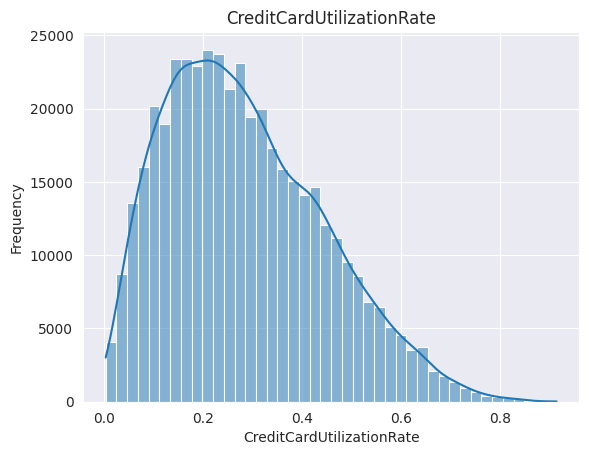

In [2197]:
sns.histplot(df['CreditCardUtilizationRate'], kde=True, stat='frequency')
plt.title('CreditCardUtilizationRate')
plt.show()

#Воспользуемся z-score нормализацией, так как распределение примерно нормально

df['CreditCardUtilizationRate'] = scaler_standard.fit_transform(df[['CreditCardUtilizationRate']])
df_test['CreditCardUtilizationRate'] = scaler_standard.fit_transform(df_test[['CreditCardUtilizationRate']])

Нормализуем NumberOfOpenCreditLines

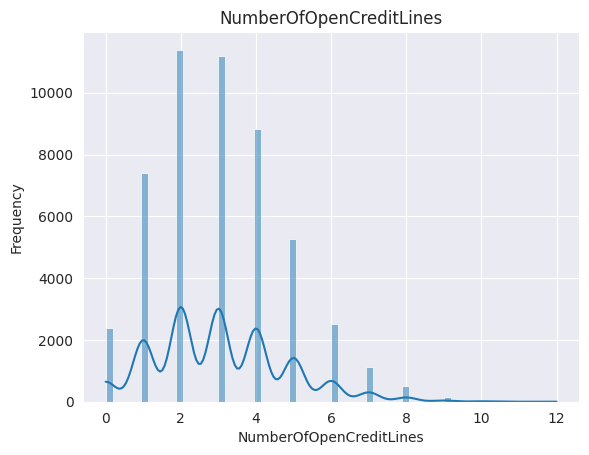

In [2198]:
sns.histplot(df['NumberOfOpenCreditLines'], kde=True, stat='frequency')
plt.title('NumberOfOpenCreditLines')
plt.show()

#Воспользуемся z-score, так как распределение примерно нормально

df['NumberOfOpenCreditLines'] = scaler_standard.fit_transform(df[['NumberOfOpenCreditLines']])
df_test['NumberOfOpenCreditLines'] = scaler_standard.fit_transform(df_test[['NumberOfOpenCreditLines']])

Нормализуем NumberOfCreditInquiries

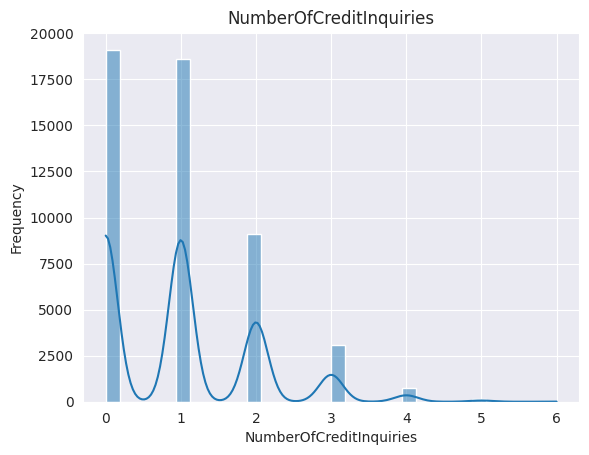

In [2199]:
sns.histplot(df['NumberOfCreditInquiries'], kde=True, stat='frequency')
plt.title('NumberOfCreditInquiries')
plt.show()

#Сначала сделаем log-преобразование, потом z-score нормализацию

df['NumberOfCreditInquiries'] = np.log1p(df[['NumberOfCreditInquiries']])
df['NumberOfCreditInquiries'] = scaler_standard.fit_transform(df[['NumberOfCreditInquiries']])

df_test['NumberOfCreditInquiries'] = np.log1p(df_test[['NumberOfCreditInquiries']])
df_test['NumberOfCreditInquiries'] = scaler_standard.fit_transform(df_test[['NumberOfCreditInquiries']])

Нормализуем BankruptcyHistory

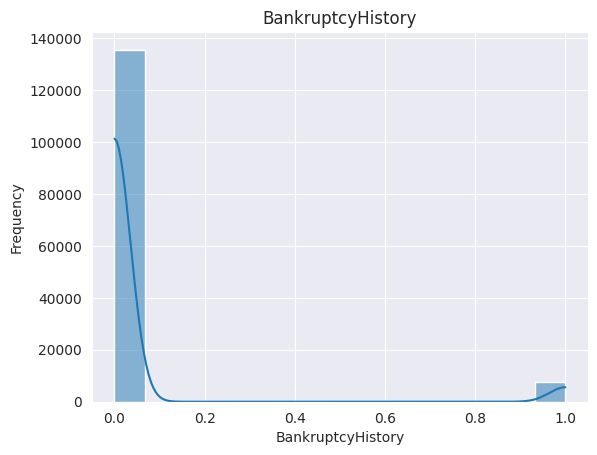

In [2200]:
sns.histplot(df['BankruptcyHistory'], kde=True, stat='frequency')
plt.title('BankruptcyHistory')
plt.show()

#Категориальный признак в нормализации не нуждается

Нормализуем PreviousLoanDefaults

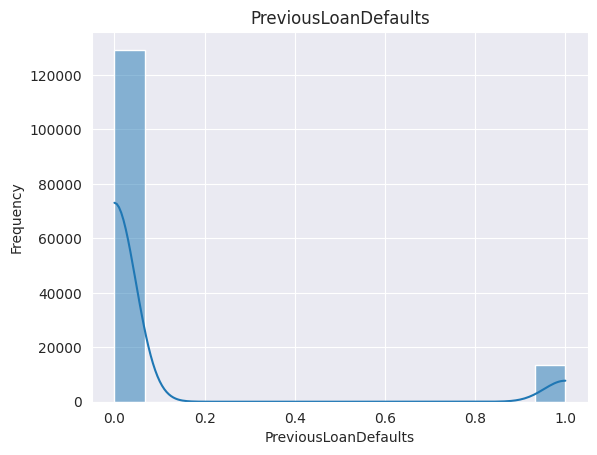

In [2201]:
sns.histplot(df['PreviousLoanDefaults'], kde=True, stat='frequency')
plt.title('PreviousLoanDefaults')
plt.show()

#Категориальный признак в нормализации не нуждается

Нормализуем PaymentHistory

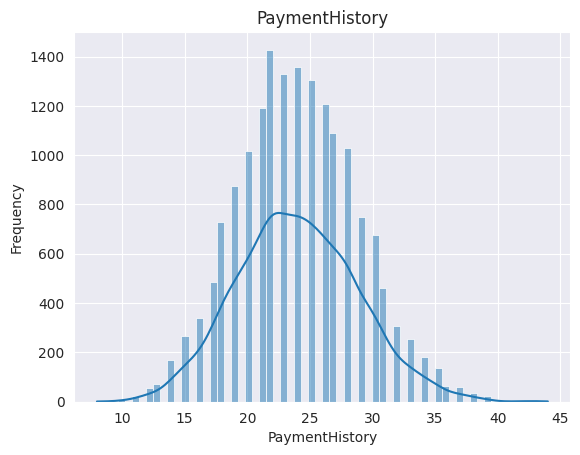

In [2202]:
sns.histplot(df['PaymentHistory'], kde=True, stat='frequency')
plt.title('PaymentHistory')
plt.show()

#Воспользуемся z-score нормализацией

df['PaymentHistory'] = scaler_standard.fit_transform(df[['PaymentHistory']])
df_test['PaymentHistory'] = scaler_standard.fit_transform(df_test[['PaymentHistory']])

Нормализуем LengthOfCreditHistory

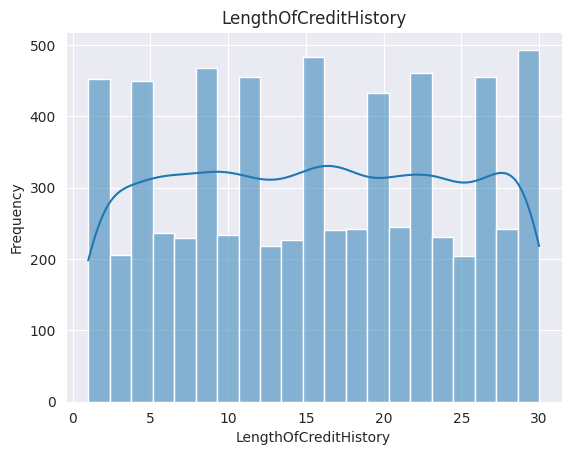

In [2203]:
sns.histplot(df['LengthOfCreditHistory'], kde=True, stat='frequency')
plt.title('LengthOfCreditHistory')
plt.show()

#Воспользуемся min-max нормализацией

df['LengthOfCreditHistory'] = scaler_min_max.fit_transform(df[['LengthOfCreditHistory']])
df_test['LengthOfCreditHistory'] = scaler_min_max.fit_transform(df_test[['LengthOfCreditHistory']])

Нормализуем SavingsAccountBalance

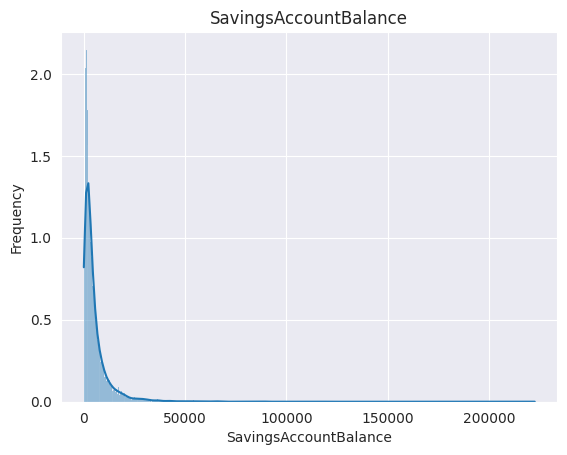

In [2204]:
sns.histplot(df['SavingsAccountBalance'], kde=True, stat='frequency')
plt.title('SavingsAccountBalance')
plt.show()

#Сделаем сначала log-преобразование, потом z-score нормализацию

df['SavingsAccountBalance'] = np.log1p(df['SavingsAccountBalance'])
df['SavingsAccountBalance'] = scaler_standard.fit_transform(df[['SavingsAccountBalance']])

df_test['SavingsAccountBalance'] = np.log1p(df_test['SavingsAccountBalance'])
df_test['SavingsAccountBalance'] = scaler_standard.fit_transform(df_test[['SavingsAccountBalance']])

Нормализуем CheckingAccountBalance

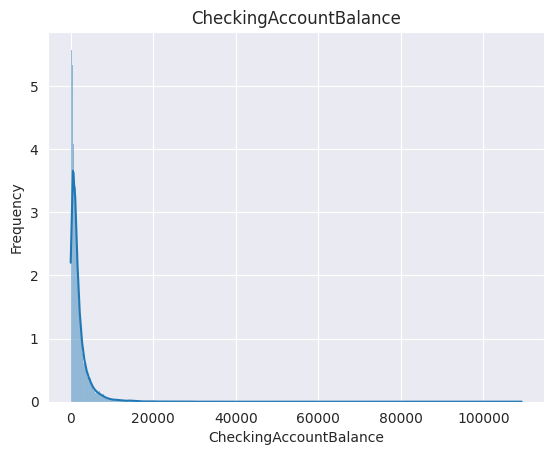

In [2205]:
sns.histplot(df['CheckingAccountBalance'], kde=True, stat='frequency')
plt.title('CheckingAccountBalance')
plt.show()

#Сделаем сначала log-преобразование, потом z-score нормализацию

df['CheckingAccountBalance'] = np.log1p(df['CheckingAccountBalance'])
df['CheckingAccountBalance'] = scaler_standard.fit_transform(df[['CheckingAccountBalance']])

df_test['CheckingAccountBalance'] = np.log1p(df_test['CheckingAccountBalance'])
df_test['CheckingAccountBalance'] = scaler_standard.fit_transform(df_test[['CheckingAccountBalance']])

Нормализуем TotalLiabilities

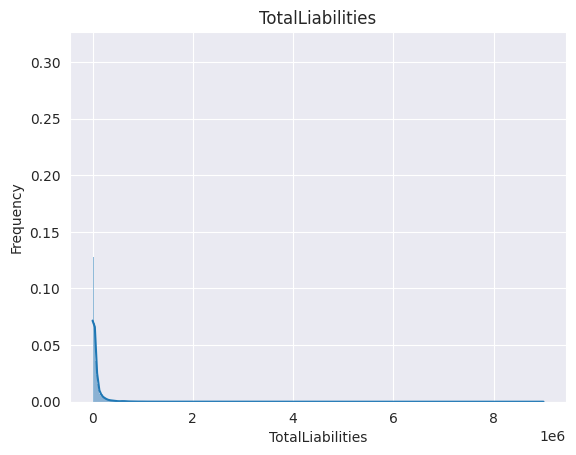

In [2206]:
sns.histplot(df['TotalLiabilities'], kde=True, stat='frequency')
plt.title('TotalLiabilities')
plt.show()

#Сделаем сначала log-преобразование, потом z-score нормализацию

df['TotalLiabilities'] = np.log1p(df['TotalLiabilities'])
df['TotalLiabilities'] = scaler_standard.fit_transform(df[['TotalLiabilities']])

df_test['TotalLiabilities'] = np.log1p(df_test['TotalLiabilities'])
df_test['TotalLiabilities'] = scaler_standard.fit_transform(df_test[['TotalLiabilities']])

Нормализуем UtilityBillsPaymentHistory

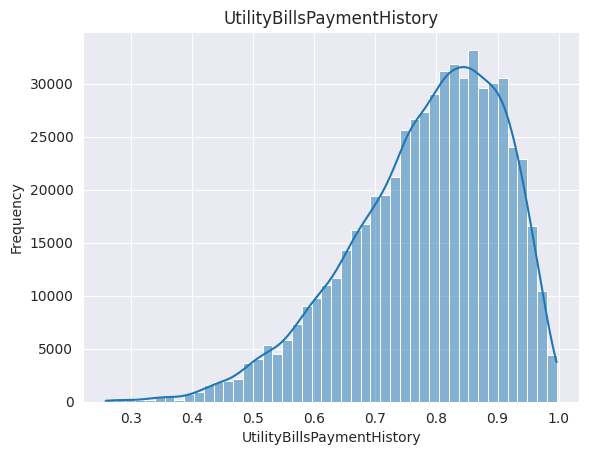

In [2207]:
sns.histplot(df['UtilityBillsPaymentHistory'], kde=True, stat='frequency')
plt.title('UtilityBillsPaymentHistory')
plt.show()

#Воспользуемся z-score нормализацией

df['UtilityBillsPaymentHistory'] = scaler_standard.fit_transform(df[['UtilityBillsPaymentHistory']])
df_test['UtilityBillsPaymentHistory'] = scaler_standard.fit_transform(df_test[['UtilityBillsPaymentHistory']])

Нормализуем JobTenure

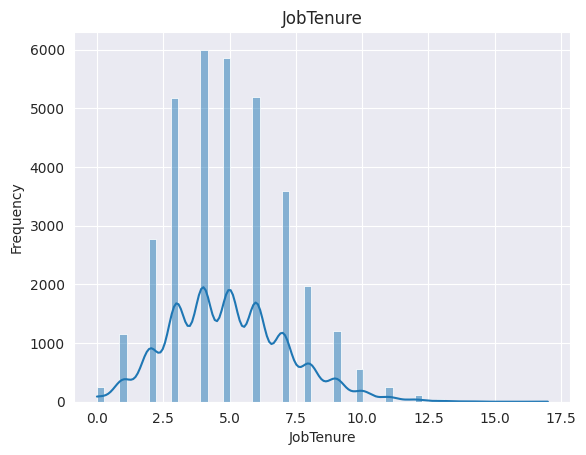

In [2208]:
sns.histplot(df['JobTenure'], kde=True, stat='frequency')
plt.title('JobTenure')
plt.show()

#Воспользуемся z_score нормализацией

df['JobTenure'] = scaler_standard.fit_transform(df[['JobTenure']])
df_test['JobTenure'] = scaler_standard.fit_transform(df_test[['JobTenure']])

Нормализуем NetWorth

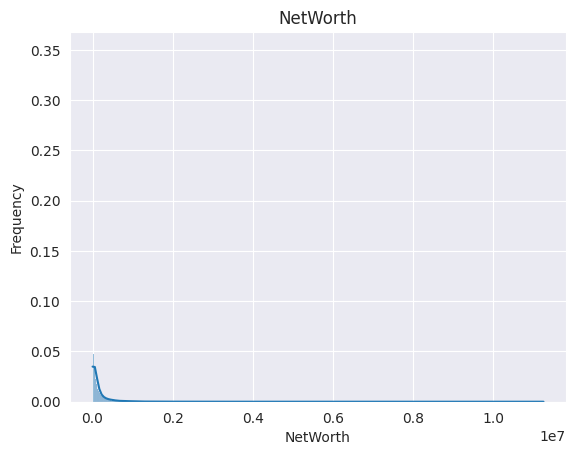

In [2209]:
sns.histplot(df['NetWorth'], kde=True, stat='frequency')
plt.title('NetWorth')
plt.show()

#Сначала сделаем log-преобразование, потом z-score нормализацию

df['NetWorth'] = np.log1p(df['NetWorth'])
df['NetWorth'] = scaler_standard.fit_transform(df[['NetWorth']])

df_test['NetWorth'] = np.log1p(df_test['NetWorth'])
df_test['NetWorth'] = scaler_standard.fit_transform(df_test[['NetWorth']])

Нормализуем LoanAmount

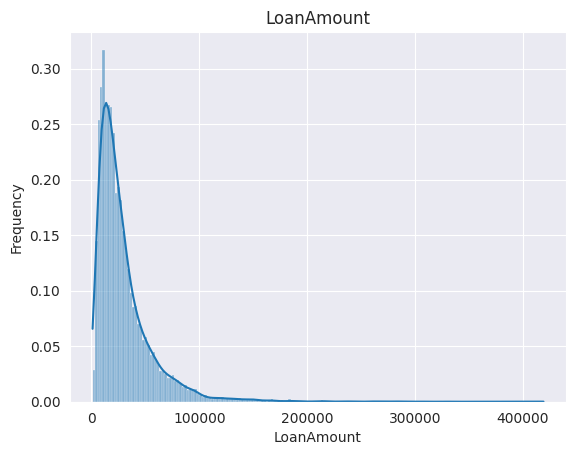

In [2210]:
sns.histplot(df['LoanAmount'], kde=True, stat='frequency')
plt.title('LoanAmount')
plt.show()

df['LoanAmount'] = np.log1p(df['LoanAmount'])
df_test['LoanAmount'] = np.log1p(df_test['LoanAmount'])

df['LoanAmount'] = scaler_standard.fit_transform(df[['LoanAmount']])
df_test['LoanAmount'] = scaler_standard.fit_transform(df_test[['LoanAmount']])

Нормализация TotalDebtToIncomeRatio

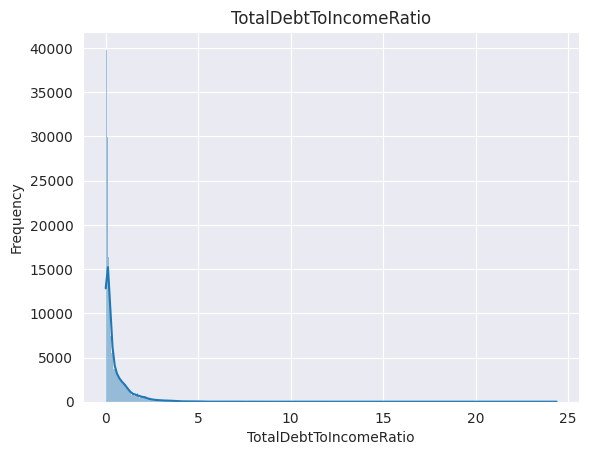

In [2211]:
sns.histplot(df['TotalDebtToIncomeRatio'], kde=True, stat='frequency')
plt.title('TotalDebtToIncomeRatio')
plt.show()

#Сначала сделаем log-преобразование, потом z-score нормализацию

df['TotalDebtToIncomeRatio'] = np.log1p(df['TotalDebtToIncomeRatio'])
df['TotalDebtToIncomeRatio'] = scaler_standard.fit_transform(df[['TotalDebtToIncomeRatio']])

df_test['TotalDebtToIncomeRatio'] = np.log1p(df_test['TotalDebtToIncomeRatio'])
df_test['TotalDebtToIncomeRatio'] = scaler_standard.fit_transform(df_test[['TotalDebtToIncomeRatio']])

### 6. Выделение целевой переменной

In [2212]:
Y_train = df.LoanApproved
Y_test = df_test.LoanApproved

X_train = df.drop(['LoanApproved'], axis=1)
X_test = df_test.drop(['LoanApproved'], axis=1)

### 6. Линейный классификатор и логистическая регрессия

Линейный классификатор

In [2213]:
class LinearClassifier:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        x = x.to_numpy(dtype=np.float64) if hasattr(x, 'to_numpy') else np.array(x, dtype=np.float64)
        y = y.to_numpy(dtype=np.float64) if hasattr(y, 'to_numpy') else np.array(y, dtype=np.float64)
        
        n_samples, n_features = x.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            linear_model = np.dot(x, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(x.T, linear_model - y)
            db = (1 / n_samples) * np.sum(linear_model - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, x):
        x = x.to_numpy(dtype=np.float64) if hasattr(x, 'to_numpy') else np.array(x, dtype=np.float64)
        linear_model = np.dot(x, self.weights) + self.bias
        return np.where(linear_model >= 0.5, 1, 0)

Логистическая регрессия

In [2214]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        x = x.to_numpy(dtype=np.float64) if hasattr(x, 'to_numpy') else np.array(x, dtype=np.float64)
        y = y.to_numpy(dtype=np.float64) if hasattr(y, 'to_numpy') else np.array(y, dtype=np.float64)

        n_samples, n_features = x.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            linear_model = np.dot(x, self.weights) + self.bias

            y_predicted = sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(x.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, x):
        x = x.to_numpy(dtype=np.float64) if hasattr(x, 'to_numpy') else np.array(x, dtype=np.float64)

        linear_model = np.dot(x, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)

        return np.where(y_predicted >= 0.5, 1, 0)
     

### 7. Обучение моделей, предсказания, метрики

In [2215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Линейный классификатор

In [2216]:
model = LinearClassifier(learning_rate=0.01, max_iter=1000)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))

Accuracy: 0.9076
Precision: 0.8948937756243012
Recall: 0.9302595893064703
F1 Score: 0.9122340425531915


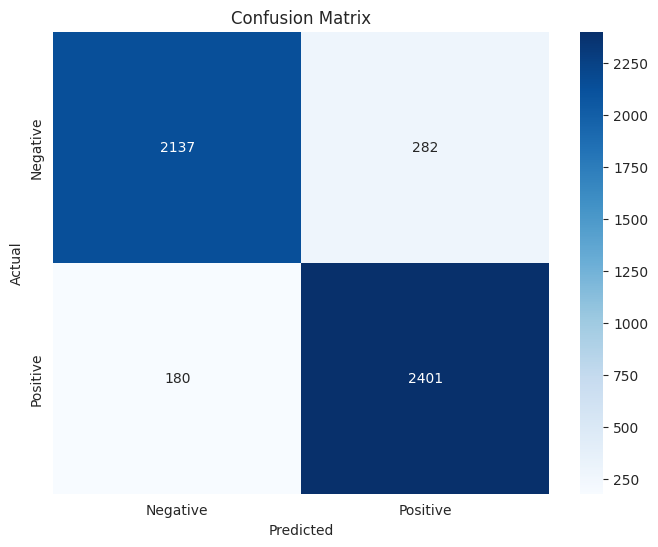

In [2217]:
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Логистическая регрессия

In [2218]:
model = LogisticRegression(learning_rate=0.01, max_iter=1000)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))

Accuracy: 0.897
Precision: 0.8673541963015647
Recall: 0.9449825648973266
F1 Score: 0.9045058409048767


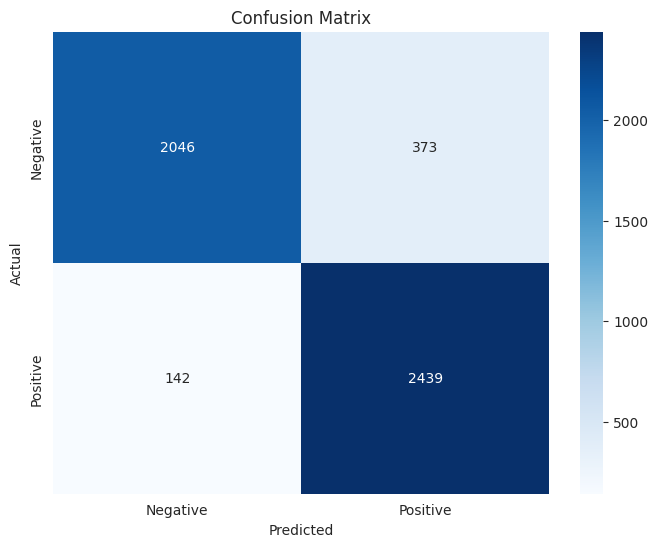

In [2219]:
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Логистическая регрессия: sklearn

In [2220]:
from sklearn.linear_model import LogisticRegression

In [2221]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))

Accuracy: 0.9162
Precision: 0.9176970633693973
Recall: 0.9201859744285161
F1 Score: 0.9189398336235248


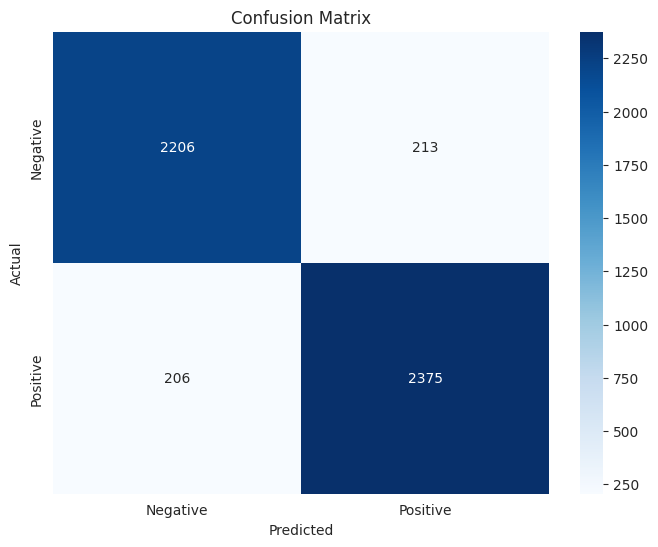

In [2222]:
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

SVM: sklearn

In [2223]:
from sklearn.svm import SVC

In [2224]:
model = SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))

Accuracy: 0.9252
Precision: 0.9203809523809524
Recall: 0.9360712901975978
F1 Score: 0.9281598155973876


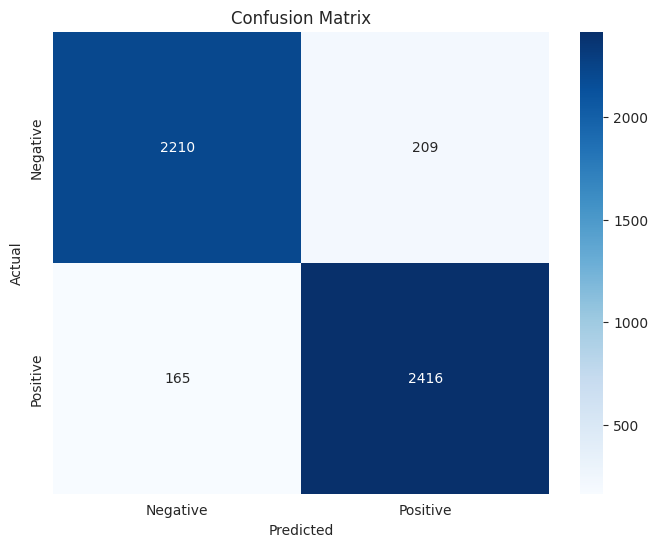

In [2225]:
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Решающее дерево: sklearn

In [2226]:
from sklearn.tree import DecisionTreeClassifier

In [2227]:
#Значения метрик изменяются в зависимости от изменения глубины
model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))

Accuracy: 0.9092
Precision: 0.9211881188118812
Recall: 0.9012010848508331
F1 Score: 0.9110849980415198


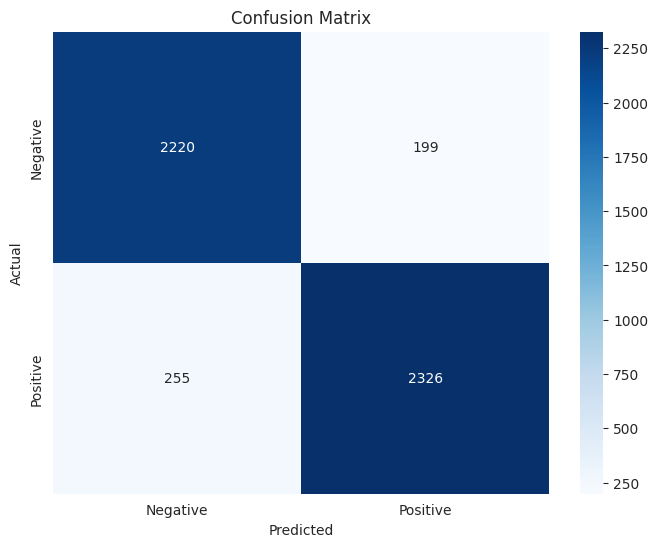

In [2228]:
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Решающее дерево: sklearn

In [2229]:
from sklearn.tree import DecisionTreeClassifier

In [2230]:
#Значения метрик изменяются в зависимости от изменения глубины
model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))

Accuracy: 0.9092
Precision: 0.9211881188118812
Recall: 0.9012010848508331
F1 Score: 0.9110849980415198


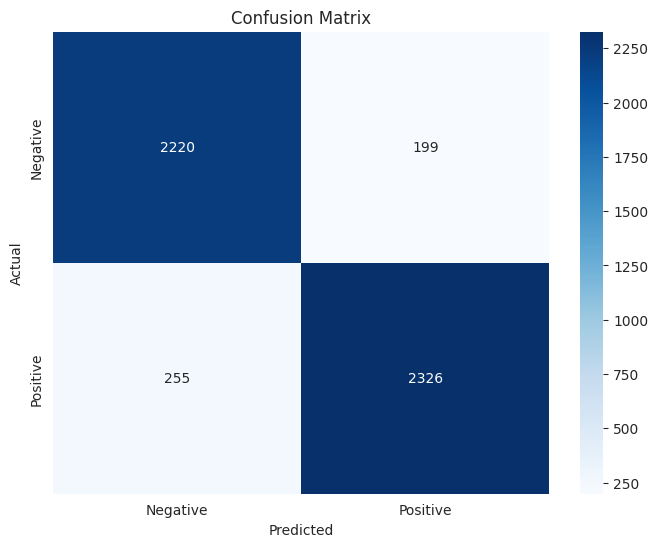

In [2231]:
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Случайный лес: sklearn

In [2232]:
from sklearn.ensemble import RandomForestClassifier

In [2233]:
model = RandomForestClassifier(n_estimators=100, max_depth=16)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))

Accuracy: 0.9088
Precision: 0.9023097311624385
Recall: 0.9232855482371174
F1 Score: 0.9126771351972425


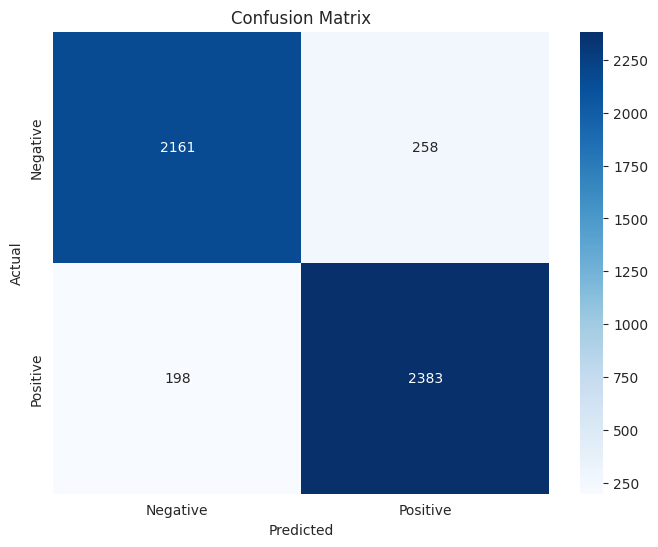

In [2234]:
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Градиентный бустинг: sklearn

In [2235]:
from sklearn.ensemble import GradientBoostingClassifier

In [2236]:
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))

Accuracy: 0.924
Precision: 0.9198779091949637
Recall: 0.934134056567222
F1 Score: 0.9269511726259131


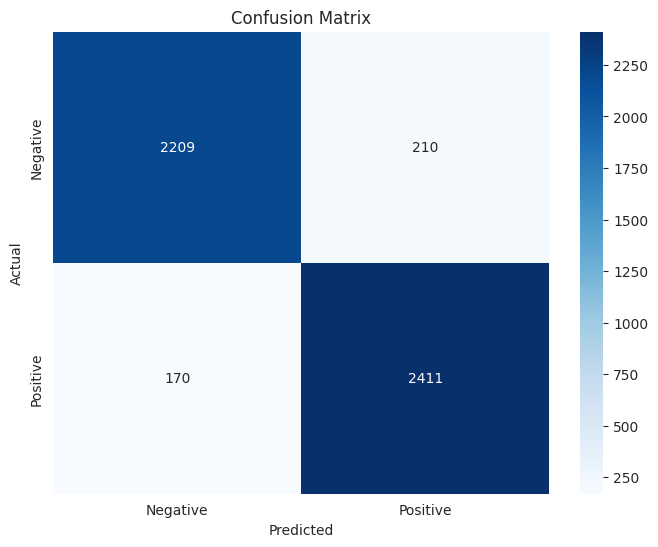

In [2237]:
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Градиентный бустинг: LightGBM

In [2238]:
import lightgbm as lgb

In [2239]:
model = lgb.LGBMClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4891, number of negative: 4638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3609
[LightGBM] [Info] Number of data points in the train set: 9529, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513275 -> initscore=0.053114
[LightGBM] [Info] Start training from score 0.053114
Accuracy: 0.9236
Precision: 0.9233731228340393
Recall: 0.9290972491282449
F1 Score: 0.9262263422170722


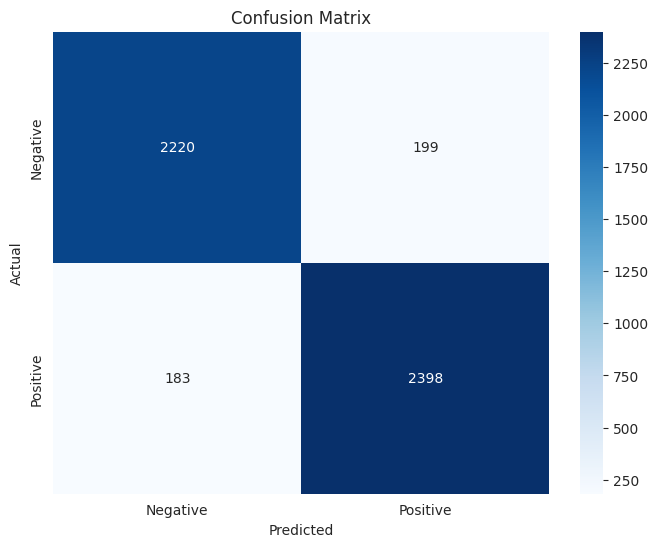

In [2240]:
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Градиентный бустинг: XGBoost

In [2241]:
import xgboost as xgb

In [2242]:
model = xgb.XGBClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))

Accuracy: 0.9216
Precision: 0.9085479656588279
Recall: 0.9430453312669508
F1 Score: 0.9254752851711027


F1 Score: 0.9254752851711027


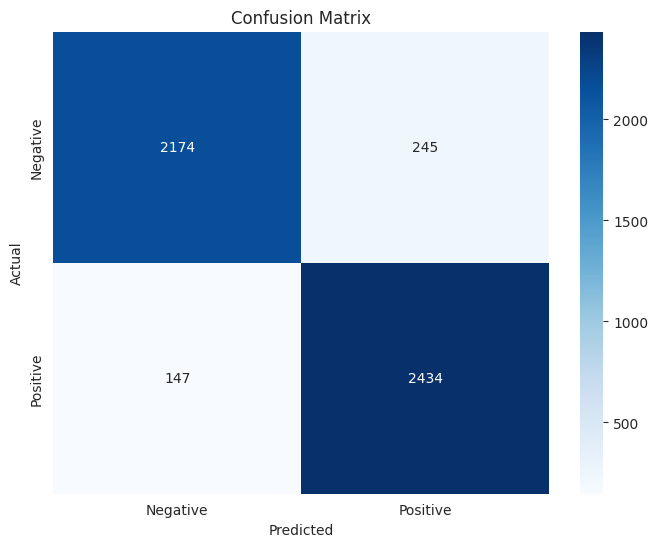

In [2243]:
print("F1 Score:", f1_score(Y_test, predictions))
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Градиентный бустинг: catboost

In [2244]:
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

In [ ]:
model = CatBoostClassifier()